In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import requests
import json

In [3]:

# API resource: U.S. Wind Turbine Database (USWTDB) API via https://eersc.usgs.gov/api/uswtdb/v1/. 
# The base path, when combined with additional query parameters,constitute the full endpoint request.
# More details can be found here: https://eerscmap.usgs.gov/uswtdb/api-doc/#keyValue
# With reference to the API resource we would like our call to return:
   
    #case_id (Unique stable identification number.)
    #t_manu (Turbine manufacturer - name of the original equipment manufacturer of the turbine.)
    #xlong (Longitude of the turbine point, in decimal degrees.) 
    #ylat (Latitude of the turbine point, in decimal degrees.)
    #t_cap (Turbine rated capacity - stated output power at rated wind speed from manufacturer, ACP, and/or internet resources in kilowatts (kW))
    #t_ttlh (Turbine total height from ground to tip of a blade at its apex in meters (m))
    #p_year (Year that the turbine became operational and began providing power. Note this may differ from the year that construction began.)

# With reference to the API resource and testing the API call would look like this:
  
# data_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&select=case_id,t_manu,xlong,ylat,t_cap,t_ttlh,p_year"

# With further reference to the API documentation we can eliminate downstream labor such as renaming and sorting 
# We can reorder our of results using "order" in our API Call.

# With reference to the API resource and testing the API call for the desired information filtered on p_year (descending in order) would look like this:

# data_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&order=p_year.asc&select=case_id,t_manu,xlong,ylat,t_cap,t_ttlh,p_year"

# We also want data for turbines that are online and generating power. We can do this by ensuring the t_cap is greater that 0.

data_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&order=p_year.asc&t_cap=gt.0&select=case_id,t_manu,xlong,ylat,t_cap,t_ttlh,p_year,t_state"

# Parse the JSON response from the API return and populate the dataframe
df = pd.read_json(data_url)

# Preview the first five records of our dataframe based on the custom URL paramters in the API request
df.head(5)


,case_id,t_manu,xlong,ylat,t_cap,t_ttlh,p_year,t_state
0,3078137,Micon,-118.37759,35.03793,108,NaN,1982.0,CA
1,3078139,Lolland,-118.37814,35.03763,75,NaN,1982.0,CA
2,3078138,Lolland,-118.37788,35.03780,75,NaN,1982.0,CA
3,3073305,Vestas,-118.35442,35.03581,65,NaN,1982.0,CA
4,3005500,Vestas,-116.67849,33.94339,65,30.4,1983.0,CA


In [4]:
# The types of data are available in the API resource and we can confirm those here:
data_types = df.dtypes
print(data_types)

case_id      int64
t_manu      object
xlong      float64
ylat       float64
t_cap        int64
t_ttlh     float64
p_year     float64
t_state     object
dtype: object


In [5]:
# check number of columns and number of rows
df.shape

(69817, 8)

In [6]:
# check for null values 
print(df.isna().sum())

case_id      0
t_manu     177
xlong        0
ylat         0
t_cap        0
t_ttlh     810
p_year       7
t_state      0
dtype: int64


In [7]:
# We have data from the API call the provides Longitude and Latitude data
# we want data that can be read as US State. GeoPandas enables that.

# the prompt for ChatGPT is: "I have a pandas dataframe has a latitude and longitude column can I use geopandas to 
# create a new column that includes US state"

# Here is the code it provided and our implementation of it.


## Yes, you can use GeoPandas to create a new column in your DataFrame that includes the US state corresponding 
## to each latitude and longitude pair. To do this, you'll need a GeoDataFrame that contains the geometry of US
## state boundaries (often available as a shapefile or GeoJSON file). Here's a step-by-step guide on how to accomplish this:

# import geopandas as gpd
# import pandas as pd
# from shapely.geometry import Point
# Replace 'us_states.shp' with the path to your US states shapefile or GeoJSON file
#us_states = gpd.read_file('us_states.shp')

# Replace 'us_states.shp' with the path to your US states shapefile or GeoJSON file
# us_states = gpd.read_file('us_states.shp')

# Replace 'your_data.csv' with the path to your data file
# data = pd.read_csv('your_data.csv')

# Assuming your data has 'latitude' and 'longitude' columns
# geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# gdf = gpd.GeoDataFrame(data, geometry=geometry)


# Perform a spatial join to get the US state for each point in your data
# merged = gpd.sjoin(gdf, us_states, op='within')

# The 'NAME' column in the 'merged' GeoDataFrame now contains the US state names
# data['US_State'] = merged['NAME']


In [8]:
# Replace 'us_states.shp' with the path to your US states shapefile or GeoJSON file
us_states = gpd.read_file("C:/Users/mford.MSBIOWORKS/Project_1/gz_2010_us_040_00_5m.json")
us_states.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [9]:
# Replace 'your_data.csv' with the path to your data file
# data = pd.read_csv('your_data.csv')
# our data are in the dataframe df
# data = df

In [10]:
# # Assuming your data has 'latitude' and 'longitude' columns
# # geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# # gdf = gpd.GeoDataFrame(data, geometry=geometry)

# geometry = [Point(xy) for xy in zip(df['xlong'], df['ylat'])]
# gdf = gpd.GeoDataFrame(df, geometry=geometry)

# #Set the CRS to EPSG:4326
# gdf.crs = 'EPSG:4326'


In [11]:
# # # Now you can perform a spatial join using gdfClusterMap as the GeoDataFrame
# # df3 = gpd.sjoin(gdfClusterMap, gdf, how="left", predicate="within")
# df_states = gpd.sjoin(gdf, us_states, how="left", predicate="within")

In [12]:
# # The 'NAME' column in the 'merged' GeoDataFrame now contains the US state names
# # data['US_State'] = merged['NAME']
# df_states.head()

In [13]:
# count the entries for each state 
turbines_per_state = df['t_state'].value_counts().reset_index()
turbines_per_state .columns = ['t_state', 'Count']
turbines_per_state .head()

,t_state,Count
0,TX,18325
1,IA,6284
2,OK,5344
3,KS,3927
4,CA,3857


In [14]:
# we dont have data for all 48 states!!!
turbines_per_state.shape

(45, 2)

In [15]:
data_types = turbines_per_state.dtypes
print(data_types)

t_state    object
Count       int64
dtype: object


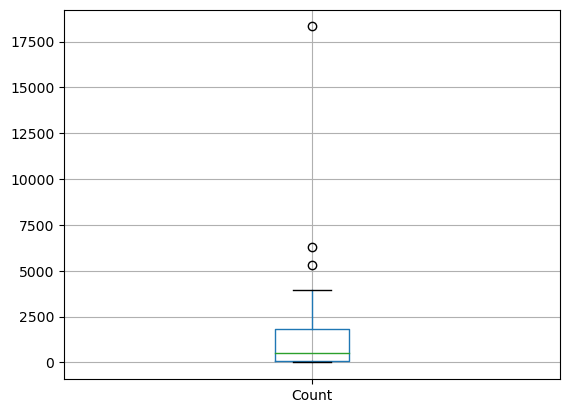

<Figure size 1200x800 with 0 Axes>

In [16]:
# We can plot of box plot to visulize the spread of the data
# There are three stand out points
turbines_per_state.boxplot(column=['Count'])
plt.figure(figsize=(12, 8))
plt.show()


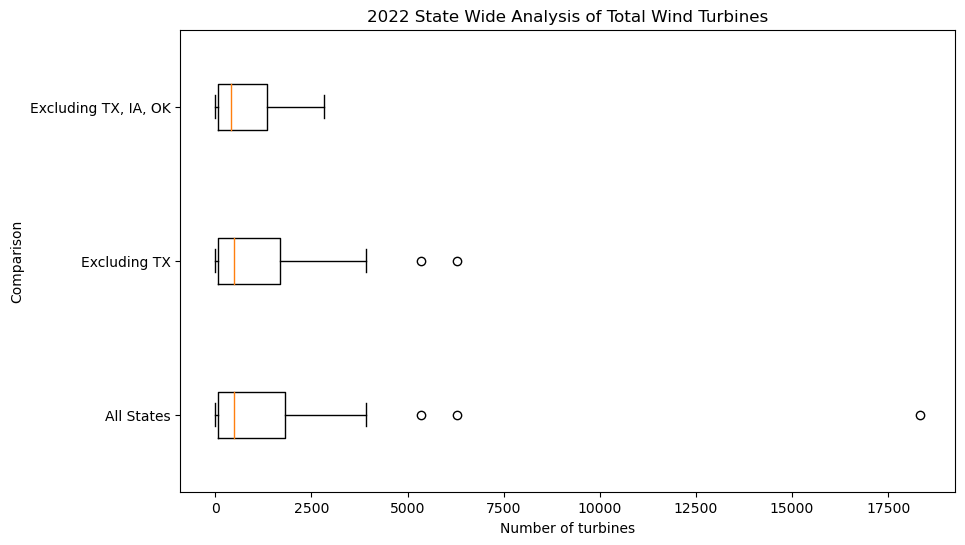

In [17]:
# We can create a new figure that plots boxplots excluding points

# Create a list of data to exclude
exclude_indices = [0, 1, 2, 3, 4, 5]

# Create a list of labels for the boxplots
labels = ['All States', 'Excluding TX', 'Excluding TX, IA, OK']

# Create a list of dataframes for each boxplot
boxplot_data = [turbines_per_state, turbines_per_state[turbines_per_state.index != exclude_indices[0]], turbines_per_state[turbines_per_state.index.isin(exclude_indices) == False]]

# Create the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([df['Count'] for df in boxplot_data], vert=False, labels=labels)

# Add labels and title
plt.xlabel('Number of turbines')
plt.ylabel('Comparison')
plt.title('2022 State Wide Analysis of Total Wind Turbines')

plt.show()

In [18]:
# min and mas values
min_value = turbines_per_state['Count'].min()
max_value = turbines_per_state['Count'].max()
print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 1
Maximum value: 18325


In [19]:
# Count of turbines per state
turbines_per_state.sort_values(by='Count', ascending=False, inplace=True)
turbines_per_state.head(10)

,t_state,Count
0,TX,18325
1,IA,6284
2,OK,5344
3,KS,3927
4,CA,3857
5,IL,3557
6,CO,2825
7,MN,2700
8,OR,2113
9,ND,2086


In [20]:
# Get State Crosswalk From Generic Website
crosswalk = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/state_codes.html'
states = pd.read_html(crosswalk)[0]

# Demo Crosswalking State Name to State Abbreviation
turbines_per_state['NAME'] = turbines_per_state['t_state'].map(dict(zip(states['Code'], states['Description'])))

turbines_per_state

,t_state,Count,NAME
0,TX,18325,Texas
1,IA,6284,Iowa
2,OK,5344,Oklahoma
3,KS,3927,Kansas
4,CA,3857,California
5,IL,3557,Illinois
6,CO,2825,Colorado
7,MN,2700,Minnesota
8,OR,2113,Oregon
9,ND,2086,North Dakota


In [21]:
# # another GeoPandas use.
merged_data = us_states.merge(turbines_per_state, left_on='NAME', right_on='NAME', how='left')
merged_data



,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,t_state,Count
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",NaN,NaN
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,122.0
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,324.0
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,1.0
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,3857.0
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",CO,2825.0
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935...",CT,3.0
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ...",DE,1.0
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800...",NaN,NaN
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...",NaN,NaN


In [22]:
# We need to remove some data to make a nice figure

merged_data = merged_data.drop([1,8,11,51])

In [23]:
# We need to add some data to make a nice figure

merged_data = merged_data.fillna(0)

In [26]:
# This code allows you to see if you have a GeoPandas dataframe

if isinstance(merged_data, gpd.GeoDataFrame):
    print("It's a GeoPandas DataFrame.")
else:
    print("It's a regular pandas DataFrame.")


It's a GeoPandas DataFrame.


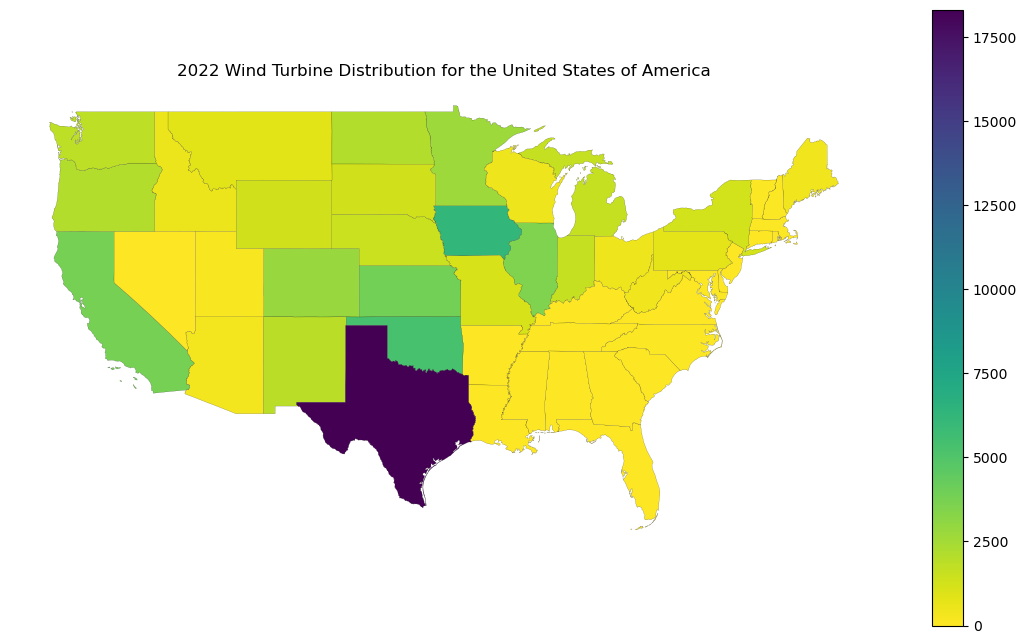

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

merged_data.plot(column='Count', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Distribution for the United States of America')

plt.show()

In [28]:
# Let's replot but remove data for Texas
merged_data.at[43, 'Count'] = 0  # Replace the value at row 0, column 'A' with 10
merged_data.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,t_state,Count
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",0,0.0
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,324.0
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,1.0
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,3857.0
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",CO,2825.0


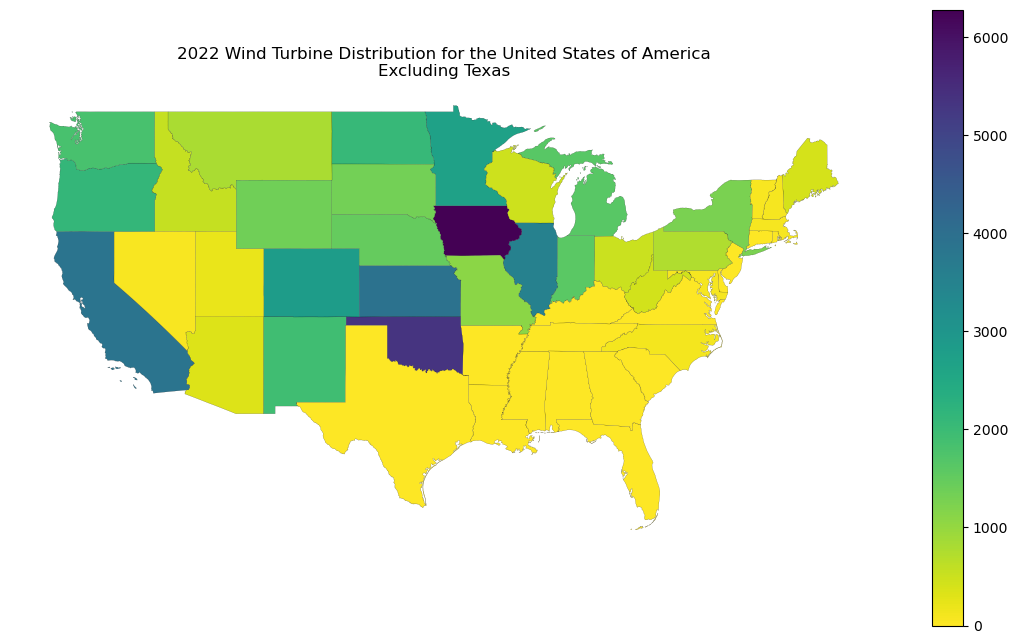

In [30]:

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

merged_data.plot(column='Count', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Distribution for the United States of America' '\n' 'Excluding Texas')

plt.show()



In [31]:
# Let's replot but remove data for Texas, Iowa and Oklahoma (the top three window produces)

merged_data.at[15, 'Count'] = 0  # Replace the value at row 0, column 'A' with 10
merged_data.at[36, 'Count'] = 0  # Replace the value at row 0, column 'A' with 10
merged_data.head(5)


,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,t_state,Count
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",0,0.0
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,324.0
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,1.0
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,3857.0
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",CO,2825.0


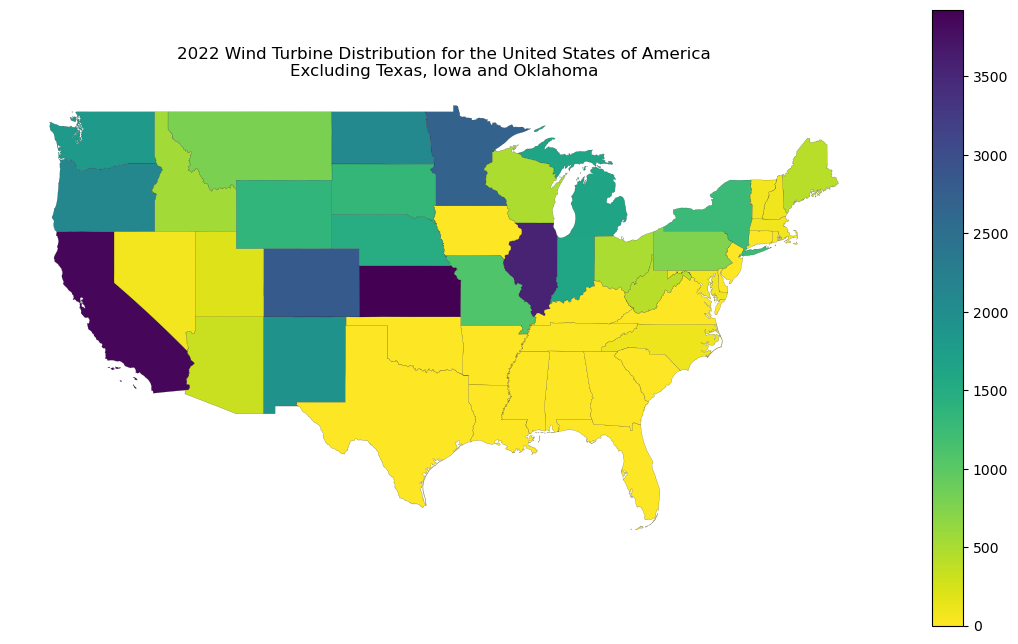

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

merged_data.plot(column='Count', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Distribution for the United States of America' '\n' 'Excluding Texas, Iowa and Oklahoma')

plt.show()

In [33]:
# Who is making all the wind turbines 
manufacturer_counts = df['t_manu'].value_counts().reset_index()
manufacturer_counts.columns = ['t_manu', 'Count']
manufacturer_counts.head(50)

,t_manu,Count
0,GE Wind,32693
1,Vestas,17043
2,Siemens,5164
3,Gamesa,3037
4,Mitsubishi,2371
5,Siemens Gamesa Renewable Energy,2247
6,Nordex,1822
7,Suzlon,1316
8,Acciona,758
9,REpower,574


In [34]:
# Filter the DataFrame to keep only the rows that you want to plot
manufacturer_counts_filtered = manufacturer_counts.loc[0:16]
print(manufacturer_counts_filtered['t_manu'].to_string(index=False))
                                                  

                        GE Wind
                         Vestas
                        Siemens
                         Gamesa
                     Mitsubishi
Siemens Gamesa Renewable Energy
                         Nordex
                         Suzlon
                        Acciona
                        REpower
                      NEG Micon
                          Enron
                          Bonus
                        Clipper
                       Nordtank
                          Micon
                       Goldwind


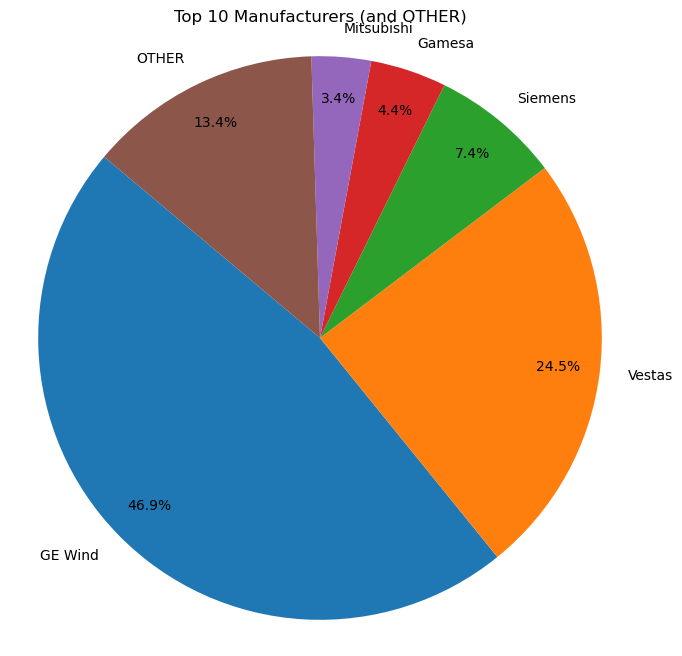

In [35]:
# Get the top 10 manufacturers and their counts
top_5 = manufacturer_counts.head(5)

# Sum the counts of the remaining manufacturers
other_count = manufacturer_counts['Count'][5:].sum()

# Create a new DataFrame for the top 10 manufacturers and 'OTHER'
top_manufacturers = top_5._append({'t_manu': 'OTHER', 'Count': other_count}, ignore_index=True)

# Create a pie chart for the top 5 manufacturers
plt.figure(figsize=(8, 8))
plt.pie(top_manufacturers['Count'], labels=top_manufacturers['t_manu'], autopct='%1.1f%%', pctdistance=0.85, startangle=140)
plt.axis('equal')
plt.title('Top 10 Manufacturers (and OTHER)')

# Show the pie chart
plt.show()

In [36]:
# How much power could the turbines generate
result_df = df.groupby('t_state')['t_cap'].sum().reset_index()
result_df = result_df.sort_values(by='t_cap', ascending=False)
result_df

,t_state,t_cap
37,TX,40383434
9,IA,12774302
30,OK,12174370
13,KS,8238120
11,IL,7442408
3,CA,5853946
4,CO,5183980
18,MN,4731885
26,NM,4311635
22,ND,4260480


In [37]:
windiest_states = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/windiest-states-2024.csv")
# print(monthly_energy_production_df)
windiest_states.head(5)

,fips,state,densityMi,pop2024,pop2023,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,WindiestStatesAverageWindSpeedMPH,MeanWindSpeed328ft,MeanWindPower328ft,MeanWindSpeed33ft
0,1,Alabama,101.15897,5123196,5098746,5031362,5006199.4,4779736,0.00480,24450,0.07186,14.70,15.5,341,9.1
1,2,Alaska,1.28344,732385,732984,732923,730653.8,710231,-0.00082,-599,0.03119,16.35,21.9,1611,16.3
2,4,Arizona,66.44574,7547837,7453517,7179943,7101150.4,6392017,0.01265,94320,0.18082,15.92,14.5,355,8.7
3,5,Arkansas,59.20375,3080667,3063152,3014195,3004367.3,2915918,0.00572,17515,0.05650,16.44,16.7,421,9.7
4,6,California,249.08392,38802044,38915693,39501653,39276883.3,37253956,-0.00292,-113649,0.04155,13.54,16.6,649,10.7


In [38]:
windiest_states = windiest_states.rename(columns={'state': 'NAME'})

In [39]:
wind_turbine_count = turbines_per_state.merge(windiest_states, on = 'NAME')
wind_turbine_count

,t_state,Count,NAME,fips,densityMi,pop2024,pop2023,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,WindiestStatesAverageWindSpeedMPH,MeanWindSpeed328ft,MeanWindPower328ft,MeanWindSpeed33ft
0,TX,18325,Texas,48,118.55740,30970988,30500280,29232474,28823782.7,25145561,0.01543,470708,0.23167,15.55,19.2,553,11.7
1,IA,6284,Iowa,19,57.39966,3206173,3203345,3190571,3176149.4,3046355,0.00088,2828,0.05246,18.09,18.6,542,11.1
2,OK,5344,Oklahoma,40,59.43509,4076950,4048375,3964912,3943555.9,3751351,0.00706,28575,0.08680,16.46,20.2,683,12.5
3,KS,3927,Kansas,20,35.90560,2935606,2936378,2937919,2929438.9,2853118,-0.00026,-772,0.02891,19.30,19.9,657,12.3
4,CA,3857,California,6,249.08392,38802044,38915693,39501653,39276883.3,37253956,-0.00292,-113649,0.04155,13.54,16.6,649,10.7
5,IL,3557,Illinois,17,222.86349,12373158,12477595,12786580,12790985.2,12830632,-0.00837,-104437,-0.03565,18.28,18.1,538,11.6
6,CO,2825,Colorado,8,56.89956,5897184,5868555,5784865,5709298.1,5029196,0.00488,28629,0.17259,20.16,20.0,751,12.8
7,MN,2700,Minnesota,27,71.94306,5728610,5722897,5709852,5669259.3,5303925,0.00100,5713,0.08007,18.51,18.9,592,12.4
8,OR,2113,Oregon,41,43.83682,4207809,4223973,4244795,4203422.9,3831074,-0.00383,-16164,0.09834,16.39,16.2,523,9.9
9,ND,2086,North Dakota,38,11.33194,781915,780588,779518,768825.3,672591,0.00170,1327,0.16254,18.80,19.6,660,12.3


In [40]:
print(wind_turbine_count.columns)


Index(['t_state', 'Count', 'NAME', 'fips', 'densityMi', 'pop2024', 'pop2023',
       'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth',
       'growthSince2010', 'WindiestStatesAverageWindSpeedMPH',
       'MeanWindSpeed328ft', 'MeanWindPower328ft', 'MeanWindSpeed33ft'],
      dtype='object')


In [41]:
# Assuming 'wind_turbine_count' is your DataFrame
columns_to_delete = ['t_state', 'fips', 'densityMi', 'pop2024', 'pop2023', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010', 'MeanWindSpeed328ft', 'MeanWindPower328ft', 'MeanWindSpeed33ft']
wind_turbine_count = wind_turbine_count.drop(columns=columns_to_delete)
wind_turbine_count

,Count,NAME,WindiestStatesAverageWindSpeedMPH
0,18325,Texas,15.55
1,6284,Iowa,18.09
2,5344,Oklahoma,16.46
3,3927,Kansas,19.30
4,3857,California,13.54
5,3557,Illinois,18.28
6,2825,Colorado,20.16
7,2700,Minnesota,18.51
8,2113,Oregon,16.39
9,2086,North Dakota,18.80


In [42]:
correlation = wind_turbine_count['Count'].corr(wind_turbine_count['WindiestStatesAverageWindSpeedMPH'])

print(f'Correlation between Column1 and Column2: {correlation}')

Correlation between Column1 and Column2: -0.05504268151880325


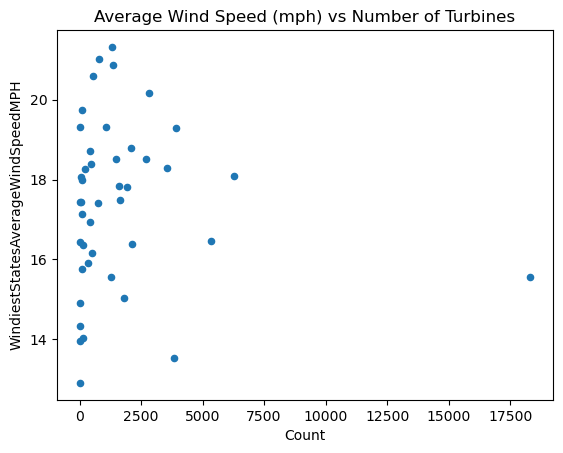

In [78]:
wind_turbine_count.plot(x='Count', y='WindiestStatesAverageWindSpeedMPH', kind='scatter', title='Average Wind Speed (mph) vs Number of Turbines')
plt.show()
